In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"D:\Netflix Dataset.csv")

In [8]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [33]:
df.shape

(7787, 11)

# 1. Remove Duplicate Records

In [34]:
#if there is a duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Length: 7787, dtype: bool

In [35]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [32]:
#remove duplicates permanently
df.drop_duplicates(inplace = True)

In [36]:
df.shape

(7787, 11)

# 2. Detect Null Values

In [37]:
df.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

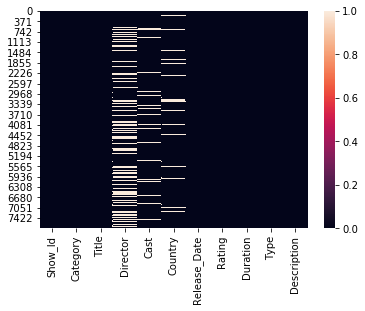

In [45]:
#heatmap of null values
sns.heatmap(df.isnull());

Get the Show Id and Director of "House of Cards"

In [48]:
df[df["Title"].isin(["House of Cards"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


# 3. Highest number of TV Shows & Movies were released

In [53]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [54]:
#convert release_date to date_time
df["Date_Time"]= pd.to_datetime(df["Release_Date"])

In [55]:
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20


In [56]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date_Time       datetime64[ns]
dtype: object

In [95]:
#count occurrence of the years
df['Date_Time'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date_Time, dtype: int64

# 4. Filtering for TV Shows & Movies

In [98]:
df.groupby(['Category']).count()

,Show_Id,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time
Category,,,,,,,,,,,
Movie,5377,5377,5214,4951,5147,5377,5372,5377,5377,5377,5377
TV Show,2410,2410,185,2118,2133,2400,2408,2410,2410,2410,2400


In [106]:
df_movies_only = df[df['Category'] == 'Movie']
df_movies_only.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20


In [107]:
df_tvshow_only = df[df['Category'] == 'TV Show']
df_tvshow_only.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01


In [112]:
df_movies_only.Category.count()

5377

In [113]:
df_tvshow_only.Category.count()

2410

C:\Users\smsm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


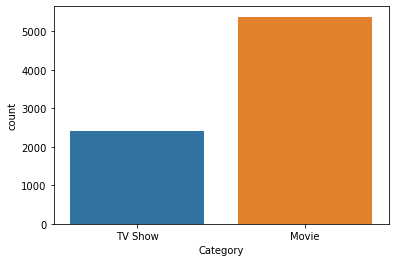

In [108]:
sns.countplot(df['Category']);

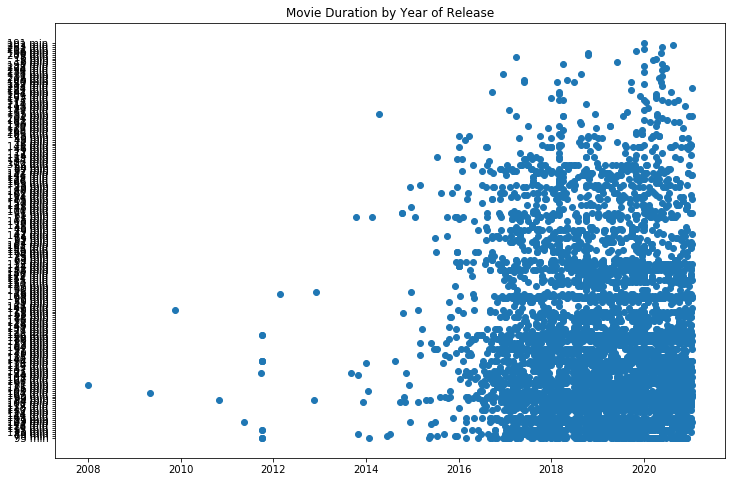

In [125]:
# Create a figure so can increase the figure size
fig = plt.figure(figsize=(12,8))
# Create a scatter plot of duration vs year
plt.scatter(df_movies_only['Date_Time'],df_movies_only['Duration'])

plt.title('Movie Duration by Year of Release')
plt.show()

All TV Shows that was Realased in Egypt only

In [142]:
df[(df['Category']== 'TV Show') & (df['Country']== 'Egypt')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time,Year
1774,s1775,TV Show,Disappearance,NaN,"Nelly Karim, Mohamed Mamdouh, Hesham Selim",Egypt,"March 8, 2019",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A university lecturer in Russia returns to Egy...,2019-03-08,2019.0
2033,s2034,TV Show,Eugenie Nights,NaN,"Ameena Khalil, Zafer Abdeen, Injy El Mokkaddem...",Egypt,"March 11, 2019",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","In 1940s Port Said, Kariman finds comfort and ...",2019-03-11,2019.0
2720,s2721,TV Show,Hidden Worlds,NaN,"Adel Imam, Salah Abdallah, Hiba Majdi, Bushra,...",Egypt,"February 5, 2019",TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",While investigating an actress’s supposed suic...,2019-02-05,2019.0
4225,s4226,TV Show,More to Say,NaN,"Yousra, Naglaa Badr, Sherine Reda, Ahmed Hatem...",Egypt,"March 13, 2019",TV-14,1 Season,"International TV Shows, TV Dramas, TV Mysteries","After her son dies in an accident, a legal con...",2019-03-13,2019.0
4630,s4631,TV Show,Once Upon a Time,NaN,"Ruby, Mohamed Farraag, Ahmed Dawood, Sawsan Ba...",Egypt,"December 9, 2020",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Fighting to save his ancestors' mansion from d...,2020-12-09,2020.0
4766,s4767,TV Show,Paranormal,NaN,"Ahmed Amin, Razane Jammal, Ayah Samaha, Samaa ...",Egypt,"November 5, 2020",TV-14,1 Season,"International TV Shows, TV Dramas, TV Horror",After a skeptical hematologist is plunged into...,2020-11-05,2020.0
5464,s5464,TV Show,Secret of the Nile,NaN,"Amr Youssef, Dina El-Sherbiny, Anoushka, Amina...",Egypt,"March 15, 2018",TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When his sister disappears while working at th...,2018-03-15,2018.0
5996,s5996,TV Show,Tayee,NaN,"Amr Youssef, Amr Abdel Guelil, Saba Mubarak",Egypt,"February 5, 2019",TV-MA,1 Season,"International TV Shows, TV Dramas",An Egyptian doctor becomes a police informant ...,2019-02-05,2019.0
6548,s6547,TV Show,The Land of Hypocrisy,NaN,"Mohamed Henedy, Dalal Abdel Aziz, Hana Shiha, ...",Egypt,"March 13, 2019",TV-14,1 Season,"International TV Shows, TV Comedies, TV Sci-Fi...",A hardworking man in a thankless job meets a m...,2019-03-13,2019.0
6568,s6567,TV Show,The Last of the Schmucks,NaN,"Chico, Ahmed Mekky, Hesham Maged, Bayoumi Foua...",Egypt,"February 7, 2019",TV-MA,1 Season,"International TV Shows, TV Comedies",The year is 2041 and a dispute between a man a...,2019-02-07,2019.0


Top 10 Directors that has highest number of TV Shows & Movies were released

In [150]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

# 5. Create a New data with NO any Missing Values 

In [151]:
new_df= df.dropna()

In [154]:
new_df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Date_Time       0
Year            0
dtype: int64

In [155]:
new_df[new_df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


In [157]:
new_df.shape

(4809, 13)

Maximum Duration of a Movie/Show

In [168]:
df['Duration'].unique()
#there are many types!

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [181]:
#split the units of the duration
df[['Number','Unit']]= df['Duration'].str.split(' ', expand= True)
df.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time,Year,Number,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,78,min


In [192]:
df['Number'].max()

'99'

Country that has Highest No. of TV Shows

In [195]:
df_tvshow=df[df['Category'] == 'TV Show']

In [197]:
df_tvshow.Country.value_counts().head(3)

United States     705
United Kingdom    204
Japan             157
Name: Country, dtype: int64

In [200]:
df_tvshow.Country.value_counts().tail(3)

Netherlands, Germany, Italy, Canada          1
Malaysia, Singapore, Hong Kong               1
United States, Netherlands, Japan, France    1
Name: Country, dtype: int64

Sort the dataset by year

In [204]:
df.sort_values(by = 'Year',ascending=False).head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_Time,Year,Number,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021-01-15,2021.0,1,Season


In [208]:
df['Type'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International